<a href="https://colab.research.google.com/github/lituldust/Machine-Learning-Study/blob/main/Neural_Networks_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Datasets

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0, 23, 23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

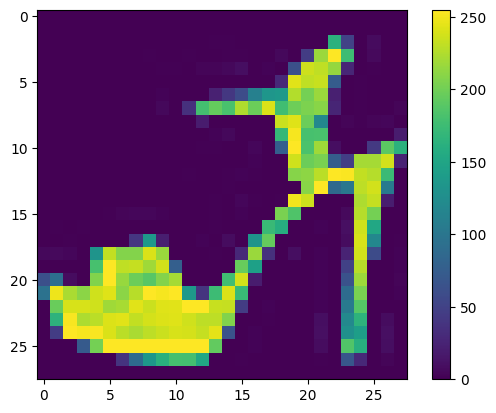

In [ ]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Building the Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compile the Model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Train the Model

In [ ]:
model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1837 - accuracy: 0.9317


Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8851
Test Accuracy:  0.8851000070571899


Making Prediction

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

313/313 [==============================] - 1s 2ms/step
Ankle boot


In [ ]:
predictions[0]

array([9.9602626e-10, 4.3990172e-13, 2.8566349e-11, 8.3762099e-13,
       2.7856498e-10, 5.9134127e-06, 9.9003019e-09, 7.7290563e-03,
       5.0612542e-11, 9.9226493e-01], dtype=float32)

Verifying Predictions

Pick a number: 45
1/1 [==============================] - 0s 22ms/step


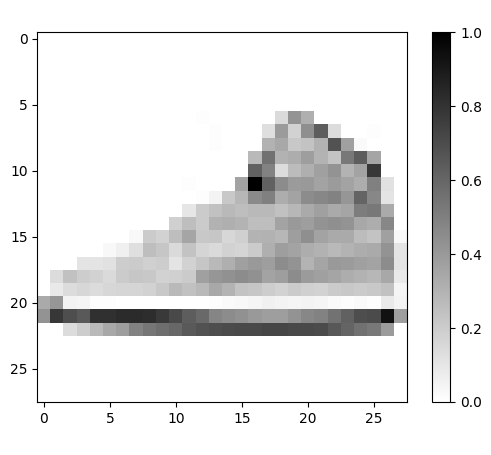

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap = plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try Again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
